In [109]:
import numpy as np
import pandas as pd
import pickle as pkl
import json
import time

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_selection import mutual_info_classif,f_classif,chi2,SelectKBest
from skfeature.function.similarity_based import fisher_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE,RandomOverSampler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score,roc_curve

# 1) Problem Statement

Gharkul Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

# 2) Data Collection

In [110]:
df_lp=pd.read_csv(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\Loan_Prediction.csv')
df=df_lp.copy()                       ### Creating copy of main dataset so that if we need original dataset for any reference we can get it as it is.

In [111]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3) EDA

In [112]:
# Check whether all the features has the int or float datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Univariate Analysis

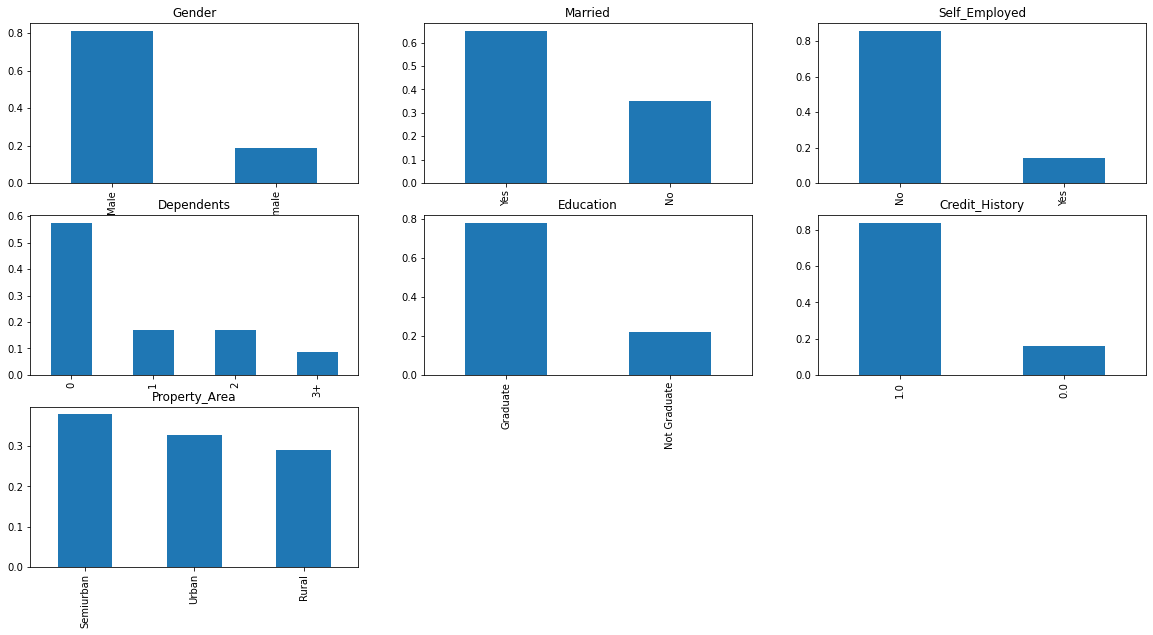

In [113]:
plt.subplot(331) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')  
plt.subplot(332) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')                  
plt.subplot(333) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')     
plt.subplot(334) 
df['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')            
plt.subplot(335) 
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')              
plt.subplot(336) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.subplot(337) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

##### Conclusion of Univariate Analysis
##### about 80% of the applicants are Males and 20% are Females
##### about 60% of the applicants are Married and 40% are Single
##### about 85% of the applicants are Not self employed and 15% are self employed
##### about 60% applicants have no responsibility of child where only 10% applicants are raising more than 3 children
##### it is good to see that 80% applicants are graduated
##### about 85% applicants repaid the previous debt while rest did not
##### talking about property area possessed by applicants they are all equally shared.

### Bivariate Analysis
In univariate analysis we could tell the proportions of applicants with respect to only one parameter. But in reality whether those proportions are feasible to get loan or not ? What combinations are needed in applicants in order to get loan? Such qustions can be answered by bivariate analysis where we will compare important feature with target column. 

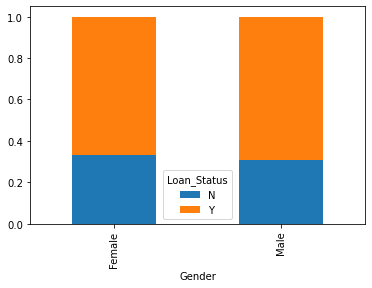

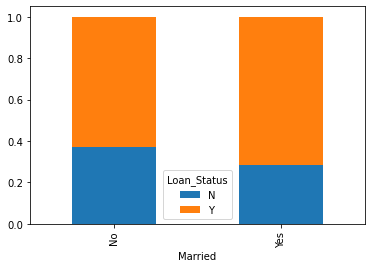

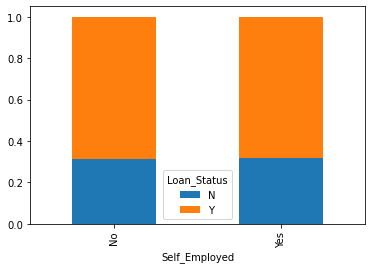

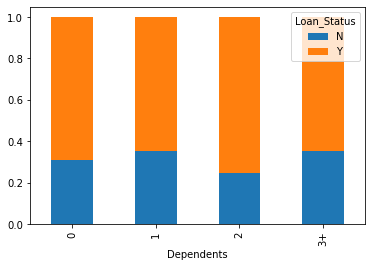

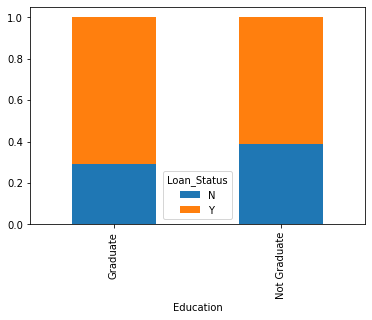

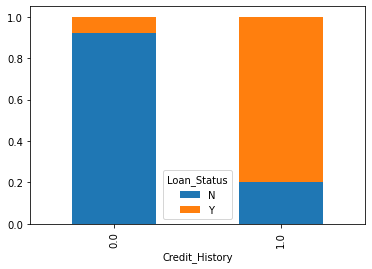

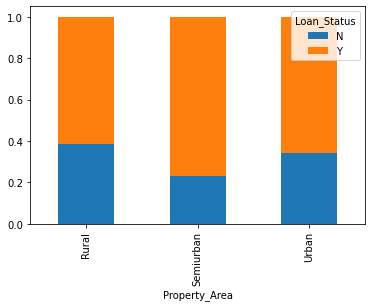

In [114]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
 
Gender.div(Gender.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Married.div(Married.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Self_Employed.div(Self_Employed.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Dependents.div(Dependents.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Education.div(Education.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Credit_History.div(Credit_History.sum(1),axis=0).plot.bar(stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1),axis=0).plot.bar(stacked=True)
plt.show()

#### Conclusion of Bivariate Analysis
##### The loan approved equally based on Gender, type of employment
##### The preference for loan approval is given to applicants who are married, who have repaid earlier debts, who are graduate and hold property in semiurban area

#### So far we have focussed on fetaures which have classification data now we will try to analyse the features with continuous data

In [115]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0, 0.5, 'Percentage')

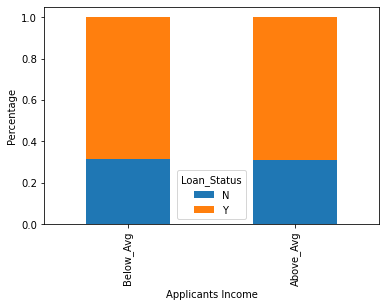

In [116]:
## We will find the mean value of the features at which loan is approved

df['ApplicantIncome'].groupby(df['Loan_Status']).get_group('Y').mean()           ## Mean income of applicants whose loan was aprroved is 5384
bins=[0,5384,df['ApplicantIncome'].max()]
groups=['Below_Avg','Above_Avg']
split_ai=pd.cut(df['ApplicantIncome'],bins=bins,labels=groups)

split_ai_crtb=pd.crosstab(split_ai,df['Loan_Status']) 
split_ai_crtb.div(split_ai_crtb.sum(1), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Applicants Income') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

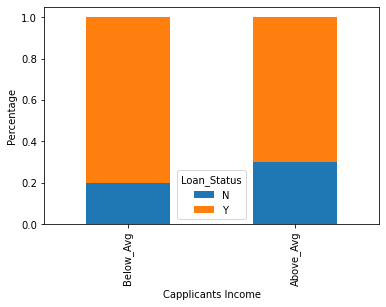

In [117]:
df['CoapplicantIncome'].groupby(df['Loan_Status']).get_group('Y').mean()    ## Mean income of Coapplicants whose loan was aprroved is 1504
bins=[0,1504,df['CoapplicantIncome'].max()]
groups=['Below_Avg','Above_Avg']
split_cai=pd.cut(df['CoapplicantIncome'],bins=bins,labels=groups)

split_cai_crtb=pd.crosstab(split_cai,df['Loan_Status']) 
split_cai_crtb.div(split_cai_crtb.sum(1), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Capplicants Income') 
plt.ylabel('Percentage')

#### It is quiet strange to note that loan approval has no effect on the income of the applicant. Whereas the loan approval is easy for appicants whose coapplicant has less income than average income of coapplicants.

### Changing the data types of features

In [118]:
# Many of the features do not have proper datatype so we have to access each feature and change its datatype

In [119]:
df['Gender'].value_counts()    ## Feature contains classification data which is nominal hence we can use one hot encoding technique to convert datatype

Male      489
Female    112
Name: Gender, dtype: int64

In [120]:
df_ohe_gender=pd.get_dummies(df['Gender'],prefix='ohe')
df_ohe_gender

,ohe_Female,ohe_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [121]:
df['Married'].value_counts()   ## Feature contains classification data which is nominal hence we can use one hot encoding technique to convert datatype

Yes    398
No     213
Name: Married, dtype: int64

In [122]:
df_ohe_married=pd.get_dummies(df['Married'],prefix='ohe')
df_ohe_married

,ohe_No,ohe_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [123]:
df['Dependents'].value_counts()     ## here the feature contains numerical discrete value except 3+ which may be the reason for dtype== object of this feature

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [124]:
df['Dependents'].replace({'3+':3},inplace=True)

In [125]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [126]:
df['Education'].value_counts()   ## here the feature contains classification items which are ordinal hence we can use label encoder or replace method

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [127]:
df['Education'].replace({'Graduate':2,'Not Graduate':1},inplace=True)
df['Education'].value_counts()

2    480
1    134
Name: Education, dtype: int64

In [128]:
df['Self_Employed'].value_counts()  ## here the feature contains classification items which are ordinal hence we can use label encoder or replace method

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [129]:
df['Self_Employed'].replace({'No':2,'Yes':1},inplace=True)
df['Self_Employed'].value_counts()

2.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [130]:
df['Property_Area'].value_counts()    ## here the feature contains classification items which are ordinal hence we can use label encoder or replace method

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [131]:
df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [132]:
df['Loan_Status'].value_counts()  ## Now this is the target column which again contains classification items hence we use Label Encoder

Y    422
N    192
Name: Loan_Status, dtype: int64

In [133]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### After performing the operation for changing the dataype let us check whether all of them have changed the datatype or not

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 60.1+ KB


In [135]:
df['Dependents']=df['Dependents'].astype('float')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(6), int32(1), int64(3), object(3)
memory usage: 60.1+ KB


#### Checking the feasibility of features using visualization of the feature's value distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

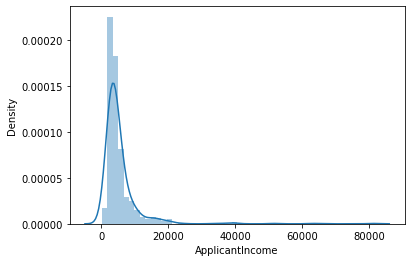

In [137]:
warnings.filterwarnings('ignore')

sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

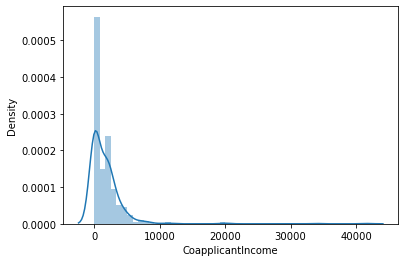

In [138]:
warnings.filterwarnings('ignore')

sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

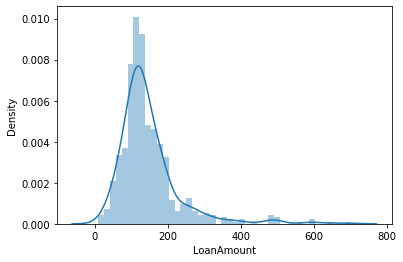

In [139]:
warnings.filterwarnings('ignore')

sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

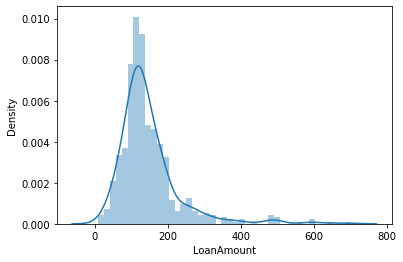

In [140]:
warnings.filterwarnings('ignore')

sns.distplot(df['LoanAmount'],kde=True)

In [141]:
# All the above three features has distribution which is right skewed because of outliers present in features.
# We will remove outliers in Feature Engineering Step.

# 4) Feature Engineering 

In [142]:
# df['ApplicantIncome'],df['CoapplicantIncome'],df['LoanAmount'],

<AxesSubplot:xlabel='ApplicantIncome'>

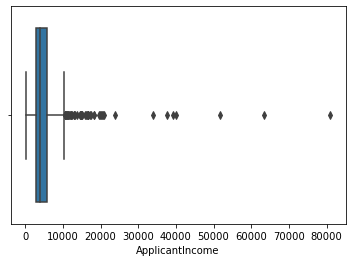

In [143]:
sns.boxplot(df['ApplicantIncome'])          ## All the points present outside the upper quartile are outliers

In [144]:
## After using every trnaformation technique, outliers are not getting replaced hence we will use Min Max Scaler technique.

In [145]:
ai_scaler=MinMaxScaler()
df['ApplicantIncome']=ai_scaler.fit_transform(df[['ApplicantIncome']])

<AxesSubplot:xlabel='CoapplicantIncome'>

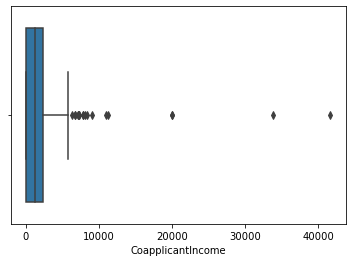

In [146]:
sns.boxplot(df['CoapplicantIncome'])          ## All the points present outside the upper quartile are outliers

In [147]:
cai_scaler=MinMaxScaler()
df['CoapplicantIncome']=cai_scaler.fit_transform(df[['CoapplicantIncome']])

<AxesSubplot:xlabel='LoanAmount'>

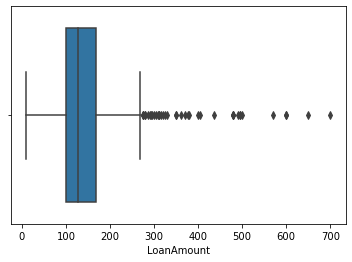

In [148]:
sns.boxplot(df['LoanAmount'])     

In [149]:
la_scaler=MinMaxScaler()
df['LoanAmount']=la_scaler.fit_transform(df[['LoanAmount']])

##### Checking if the features have any NaN values

In [150]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
df['Gender']=df['Gender'].fillna(method='ffill')
df['Gender'].isna().sum()

0

In [152]:
df['Married']=df['Married'].fillna(method='ffill')
df['Married'].isna().sum()

0

In [153]:
df['Dependents']=df['Dependents'].fillna(method='ffill')
df['Dependents'].isna().sum()

0

In [154]:
df['Self_Employed']=df['Self_Employed'].fillna(method='ffill')
df['Self_Employed'].isna().sum()

0

In [155]:
df['LoanAmount']=df['LoanAmount'].fillna(method='ffill')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(method='ffill')
df['Credit_History']=df['Credit_History'].fillna(method='ffill')

In [156]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

# 5) Feature Selection

In [158]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [159]:
# here Loan_ID feature holds no relation with target column so we can drop it.
# the features Gender,Married are one hot encoded hence they can be dropped as well

In [160]:
df.drop(['Loan_ID', 'Gender', 'Married'],axis=1,inplace=True)

In [161]:
# Concatenating the one hot encoded features to df

In [162]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,2,2.0,0.070489,0.000000,0.160637,360.0,1.0,2,1
1,1.0,2,2.0,0.054830,0.036192,0.172214,360.0,1.0,0,0
2,0.0,2,1.0,0.035250,0.000000,0.082489,360.0,1.0,2,1
3,0.0,1,2.0,0.030093,0.056592,0.160637,360.0,1.0,2,1
4,0.0,2,2.0,0.072356,0.000000,0.191027,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0.0,2,2.0,0.034014,0.000000,0.089725,360.0,1.0,0,1
610,3.0,2,2.0,0.048930,0.000000,0.044863,180.0,1.0,0,1
611,1.0,2,2.0,0.097984,0.005760,0.353111,360.0,1.0,2,1
612,2.0,2,2.0,0.091936,0.000000,0.257598,360.0,1.0,2,1


##### The final DataFrame

In [163]:
df1=pd.concat([df,df_ohe_gender,df_ohe_married],axis=1) 
df1

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ohe_Female,ohe_Male,ohe_No,ohe_Yes
0,0.0,2,2.0,0.070489,0.000000,0.160637,360.0,1.0,2,1,0,1,1,0
1,1.0,2,2.0,0.054830,0.036192,0.172214,360.0,1.0,0,0,0,1,0,1
2,0.0,2,1.0,0.035250,0.000000,0.082489,360.0,1.0,2,1,0,1,0,1
3,0.0,1,2.0,0.030093,0.056592,0.160637,360.0,1.0,2,1,0,1,0,1
4,0.0,2,2.0,0.072356,0.000000,0.191027,360.0,1.0,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2,2.0,0.034014,0.000000,0.089725,360.0,1.0,0,1,1,0,1,0
610,3.0,2,2.0,0.048930,0.000000,0.044863,180.0,1.0,0,1,0,1,0,1
611,1.0,2,2.0,0.097984,0.005760,0.353111,360.0,1.0,2,1,0,1,0,1
612,2.0,2,2.0,0.091936,0.000000,0.257598,360.0,1.0,2,1,0,1,0,1


In [164]:
df1.corr()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ohe_Female,ohe_Male,ohe_No,ohe_Yes
Dependents,1.000000,-0.054909,-0.044505,0.115036,0.026683,0.142077,-0.085453,-0.070299,0.005131,-0.003361,-0.171774,0.148294,-0.331633,0.331511
Education,-0.054909,1.000000,-0.008734,0.140760,0.062290,0.151678,0.080674,0.084637,0.065243,0.085884,0.045364,-0.061497,0.012304,-0.017671
Self_Employed,-0.044505,-0.008734,1.000000,-0.122728,0.021807,-0.099575,0.035485,0.010803,0.037106,-0.009035,0.008352,0.017387,-0.001638,-0.002497
ApplicantIncome,0.115036,0.140760,-0.122728,1.000000,-0.116605,0.533304,-0.042849,-0.020183,-0.009500,-0.004710,-0.058809,0.013933,-0.051708,0.050194
CoapplicantIncome,0.026683,0.062290,0.021807,-0.116605,1.000000,0.189895,-0.067336,0.009391,0.010522,-0.059187,-0.082912,0.082316,-0.075948,0.080496
LoanAmount,0.142077,0.151678,-0.099575,0.533304,0.189895,1.000000,0.023614,-0.013271,-0.038868,-0.044721,-0.109263,0.067962,-0.131962,0.132472
Loan_Amount_Term,-0.085453,0.080674,0.035485,-0.042849,-0.067336,0.023614,1.000000,-0.031843,-0.066556,-0.033378,0.078273,-0.074998,0.104580,-0.107107
Credit_History,-0.070299,0.084637,0.010803,-0.020183,0.009391,-0.013271,-0.031843,1.000000,0.021124,0.525152,0.004817,0.004780,-0.008884,0.004315
Property_Area,0.005131,0.065243,0.037106,-0.009500,0.010522,-0.038868,-0.066556,0.021124,1.000000,0.032112,0.025752,-0.017054,-0.004257,0.000395
Loan_Status,-0.003361,0.085884,-0.009035,-0.004710,-0.059187,-0.044721,-0.033378,0.525152,0.032112,1.000000,-0.017987,0.025407,-0.091478,0.084281


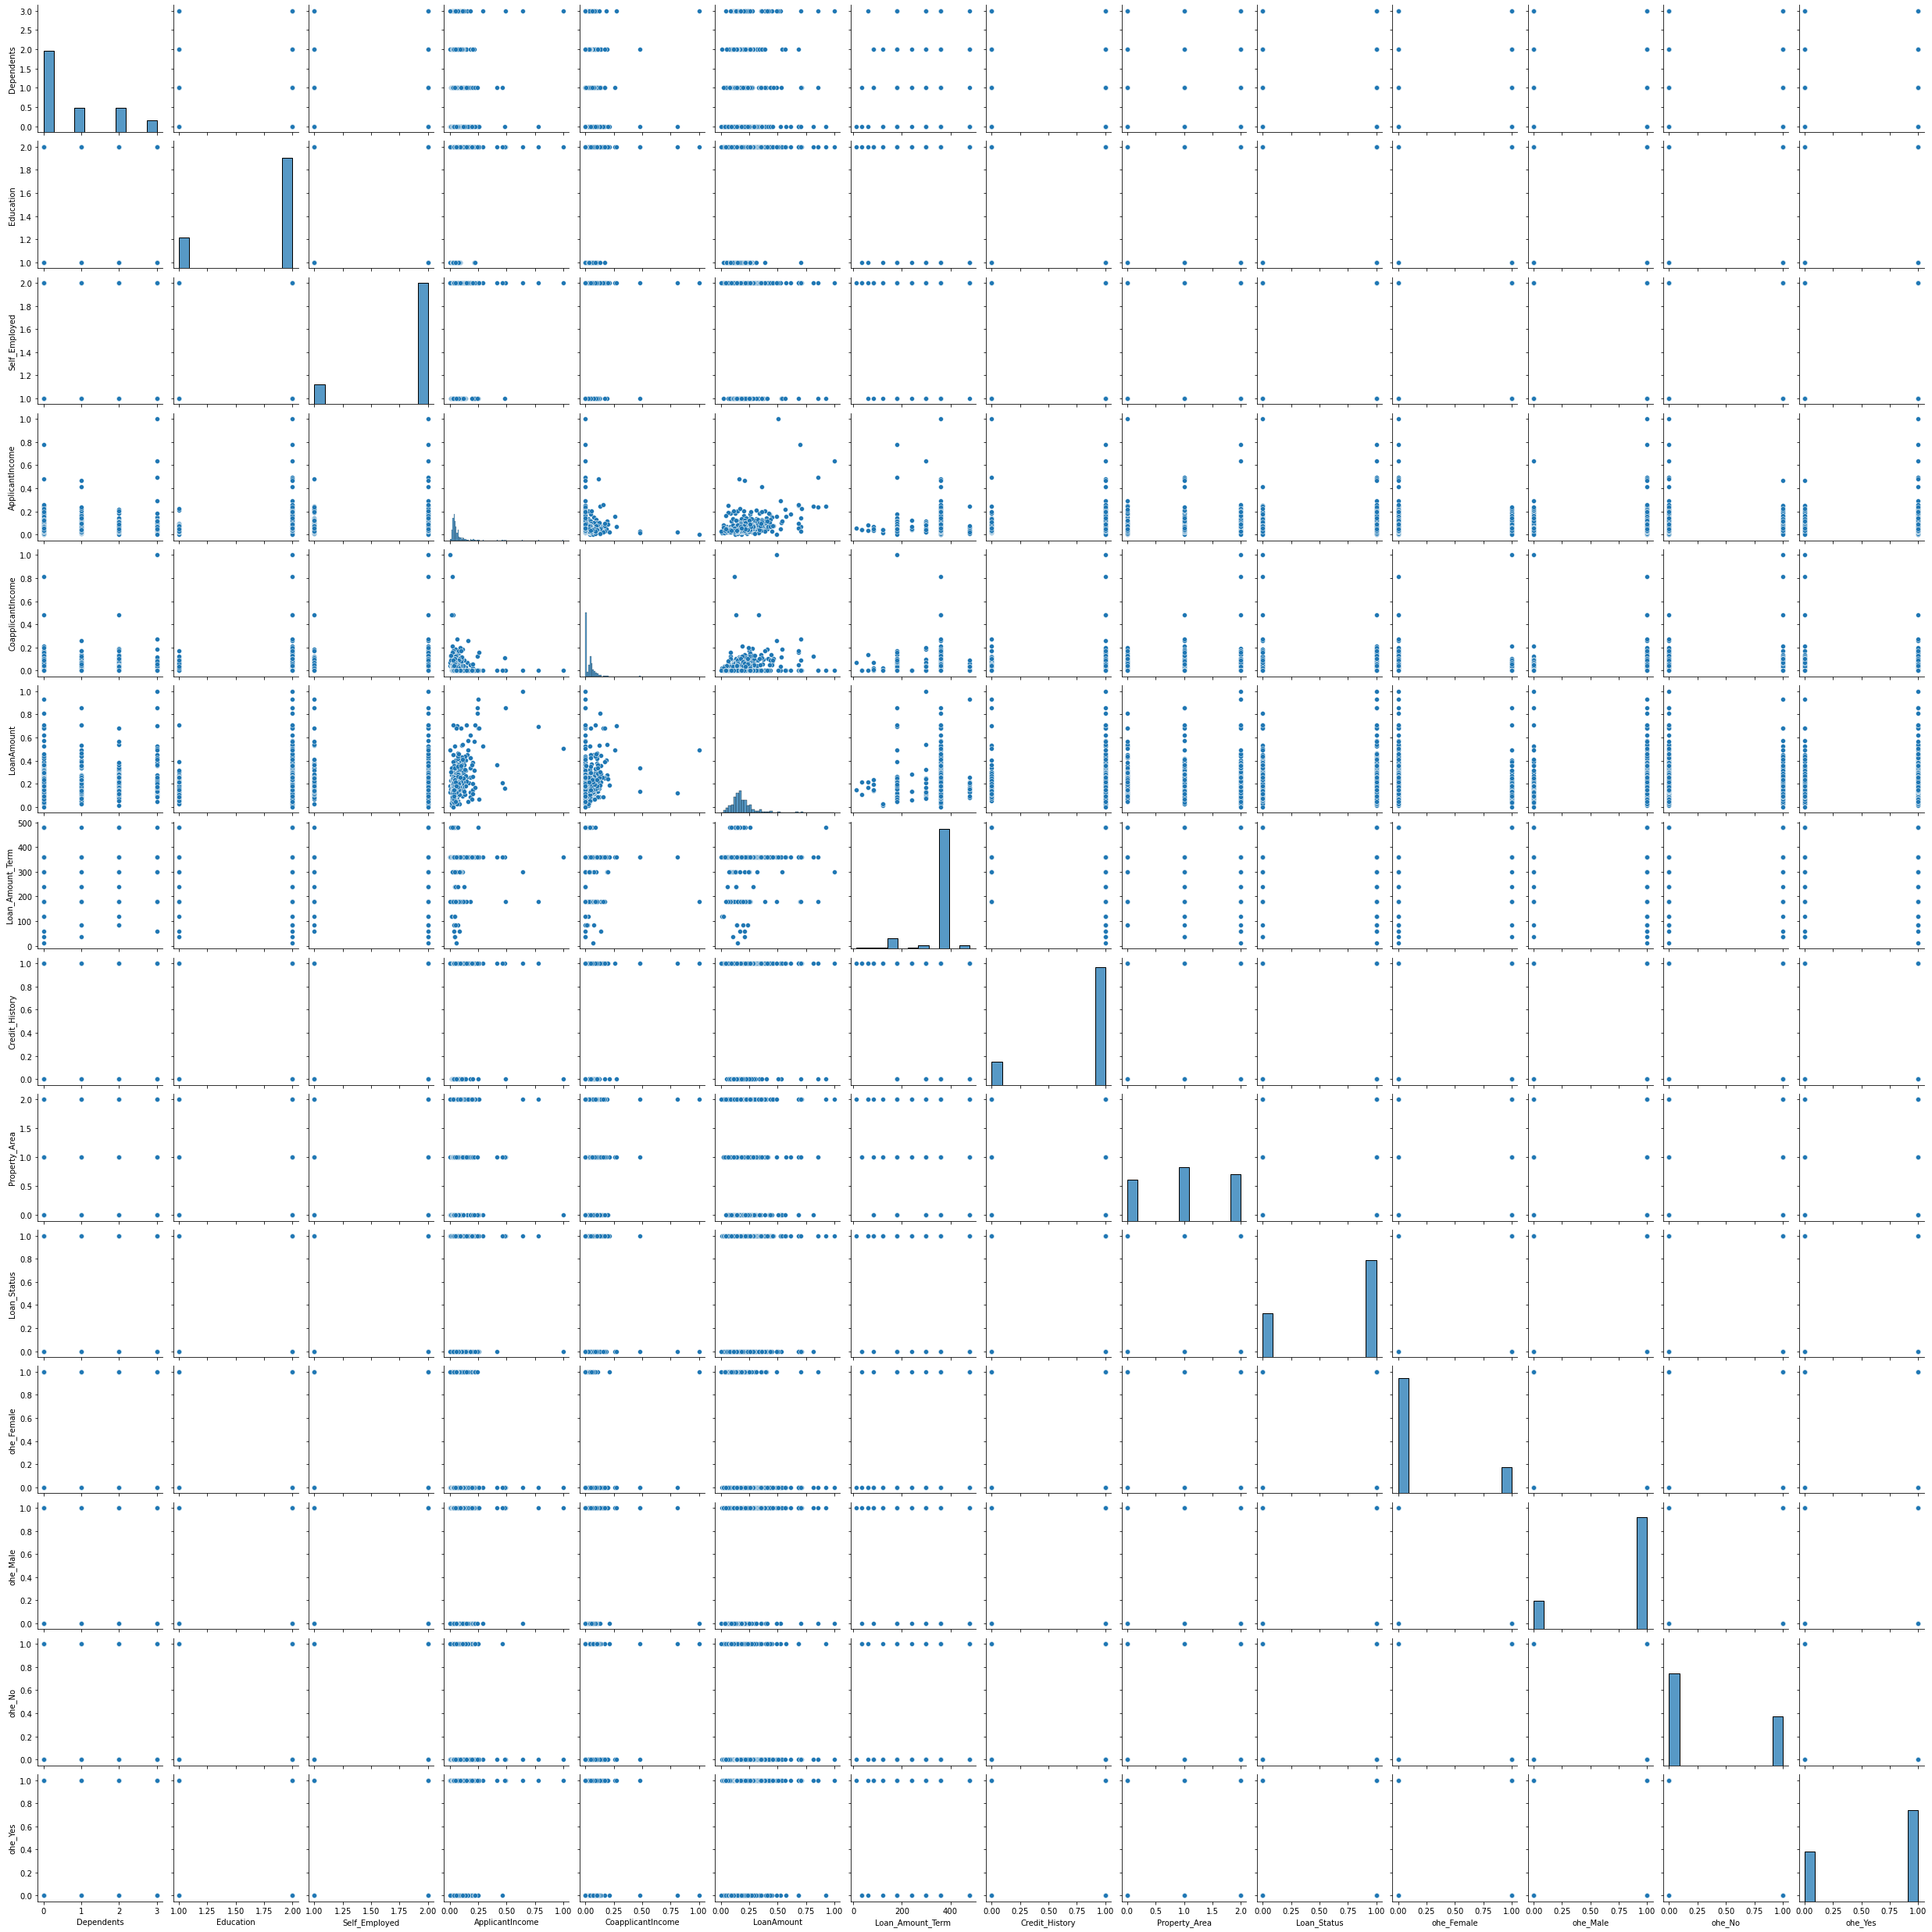

In [165]:
sns.pairplot(df1)

# 6) 7) Model Training and Model Evaluation

In [166]:
x=df1.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [167]:
x.shape,y.shape

((614, 13), (614,))

In [168]:
df1['Loan_Status'].value_counts()           ## The data is imbalanced hence we have to balance the data using SMOTE or RandomOverSampler

1    422
0    192
Name: Loan_Status, dtype: int64

In [169]:
smt=SMOTE(random_state=13,sampling_strategy=0.95)
x_sampled,y_sampled=smt.fit_resample(x,y)

In [170]:
x_sampled.shape,y_sampled.shape

((822, 13), (822,))

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,random_state=23,test_size=0.25)

### Logistic Regression

In [172]:
%%time
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

Wall time: 49.9 ms


LogisticRegression()

In [173]:
%%time
y_pred_test=lg_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test,y_pred_test)
test_clf_report=classification_report(y_test,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.7233009708737864 

Test Confusion Matrix =  
 [[50 49]
 [ 8 99]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.86      0.51      0.64        99
           1       0.67      0.93      0.78       107

    accuracy                           0.72       206
   macro avg       0.77      0.72      0.71       206
weighted avg       0.76      0.72      0.71       206

Wall time: 8 ms


In [174]:
%%time
y_pred_train=lg_model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train,y_pred_train)
train_clf_report=classification_report(y_train,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  0.7548701298701299 

train Confusion Matrix =  
 [[166 135]
 [ 16 299]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       0.91      0.55      0.69       301
           1       0.69      0.95      0.80       315

    accuracy                           0.75       616
   macro avg       0.80      0.75      0.74       616
weighted avg       0.80      0.75      0.74       616

Wall time: 6.51 ms


In [175]:
print('LOGISTIC REGRESSION')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

LOGISTIC REGRESSION
Variance is  3.1569158996343494
Bias is  19.512987012987004


### Decision Tree Classifier

In [176]:
%%time
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

Wall time: 10.4 ms


DecisionTreeClassifier()

In [177]:
%%time
y_pred_test=dt_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test,y_pred_test)
test_clf_report=classification_report(y_test,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.7524271844660194 

Test Confusion Matrix =  
 [[69 30]
 [21 86]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        99
           1       0.74      0.80      0.77       107

    accuracy                           0.75       206
   macro avg       0.75      0.75      0.75       206
weighted avg       0.75      0.75      0.75       206

Wall time: 8.76 ms


In [178]:
%%time
y_pred_train=dt_model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train,y_pred_train)
train_clf_report=classification_report(y_train,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  1.0 

train Confusion Matrix =  
 [[301   0]
 [  0 315]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       315

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616

Wall time: 6 ms


In [179]:
print('LOGISTIC REGRESSION')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

LOGISTIC REGRESSION
Variance is  24.75728155339806
Bias is  -5.000000000000004


### Random Forest Classifier

In [180]:
%%time
rfc_model=RandomForestClassifier()
rfc_model.fit(x_train,y_train)

Wall time: 173 ms


RandomForestClassifier()

In [181]:
%%time
y_pred_test=rfc_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test,y_pred_test)
test_clf_report=classification_report(y_test,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.8009708737864077 

Test Confusion Matrix =  
 [[73 26]
 [15 92]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.78      0.86      0.82       107

    accuracy                           0.80       206
   macro avg       0.80      0.80      0.80       206
weighted avg       0.80      0.80      0.80       206

Wall time: 16 ms


In [182]:
%%time
y_pred_train=rfc_model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train,y_pred_train)
train_clf_report=classification_report(y_train,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  1.0 

train Confusion Matrix =  
 [[301   0]
 [  0 315]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       315

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616

Wall time: 28.5 ms


In [183]:
print('RANDOM FOREST CLASSIFIER')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

RANDOM FOREST CLASSIFIER
Variance is  19.902912621359224
Bias is  -5.000000000000004


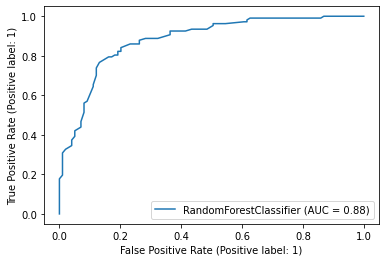

In [206]:
plot_roc_curve(rfc_model,x_test,y_test)

### Here we can find the most important features

<AxesSubplot:xlabel='Feature Name'>

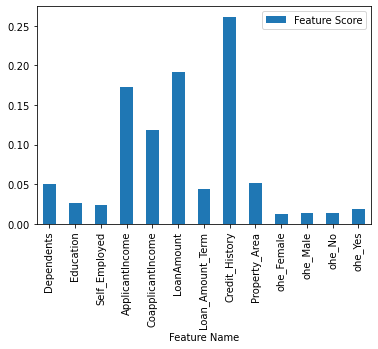

In [236]:
df_imp_features=pd.DataFrame({'Feature Name':x.columns,'Feature Score':rfc_model.feature_importances_})
df_imp_features.plot(0,kind='bar')            

## More the feature score , more important it is.

### XGBClassifer

In [185]:
%%time
xgb_model=xgboost.XGBClassifier()
xgb_model.fit(x_train,y_train)

Wall time: 480 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [186]:
%%time
y_pred_test=xgb_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test,y_pred_test)
test_clf_report=classification_report(y_test,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.7864077669902912 

Test Confusion Matrix =  
 [[70 29]
 [15 92]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.76      0.86      0.81       107

    accuracy                           0.79       206
   macro avg       0.79      0.78      0.78       206
weighted avg       0.79      0.79      0.78       206

Wall time: 8.51 ms


In [187]:
%%time
y_pred_train=xgb_model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train,y_pred_train)
train_clf_report=classification_report(y_train,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  1.0 

train Confusion Matrix =  
 [[301   0]
 [  0 315]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       315

    accuracy                           1.00       616
   macro avg       1.00      1.00      1.00       616
weighted avg       1.00      1.00      1.00       616

Wall time: 9.03 ms


In [188]:
print('XGBCLASSIFIER')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

XGBCLASSIFIER
Variance is  21.359223300970875
Bias is  -5.000000000000004


### SVC

In [189]:
%%time
svc_model=SVC()
svc_model.fit(x_train,y_train)

Wall time: 29.7 ms


SVC()

In [190]:
%%time
y_pred_test=svc_model.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test,y_pred_test)
test_clf_report=classification_report(y_test,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.5145631067961165 

Test Confusion Matrix =  
 [[  2  97]
 [  3 104]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.40      0.02      0.04        99
           1       0.52      0.97      0.68       107

    accuracy                           0.51       206
   macro avg       0.46      0.50      0.36       206
weighted avg       0.46      0.51      0.37       206

Wall time: 25 ms


In [191]:
%%time
y_pred_train=svc_model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train,y_pred_train)
train_clf_report=classification_report(y_train,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  0.5357142857142857 

train Confusion Matrix =  
 [[ 18 283]
 [  3 312]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       0.86      0.06      0.11       301
           1       0.52      0.99      0.69       315

    accuracy                           0.54       616
   macro avg       0.69      0.53      0.40       616
weighted avg       0.69      0.54      0.41       616

Wall time: 44.1 ms


In [192]:
print('XGBCLASSIFIER')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

XGBCLASSIFIER
Variance is  2.11511789181692
Bias is  41.42857142857142


## Hyperparameter Tuning

In [193]:
# From above all models we can see that the base models RandomForestClassifier and XGBClassifier give more accurate answers.
# Hence we choose those models for hyperparameter tuning

### Optimal Random Forest Classifier

In [194]:
x_train_hyp,x_test_hyp,y_train_hyp,y_test_hyp=train_test_split(x_sampled,y_sampled,random_state=13,test_size=0.30)

In [195]:
%%time
model1=RandomForestClassifier()
param_dict={'n_estimators':np.arange(80,150,5),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,20,1),
    'min_samples_split':np.arange(2,8,1),
    'min_samples_leaf':np.arange(2,8,1)}
rscv=RandomizedSearchCV(model1,param_dict,cv=10)
rscv.fit(x_train_hyp,y_train_hyp)
optimal_rfc_model=rscv.best_estimator_
optimal_rfc_model

Wall time: 13.3 s


RandomForestClassifier(max_depth=17, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=135)

In [196]:
optimal_rfc_model.fit(x_train_hyp,y_train_hyp)

RandomForestClassifier(max_depth=17, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=135)

In [197]:
%%time
y_pred_test=optimal_rfc_model.predict(x_test_hyp)
test_accuracy=accuracy_score(y_test_hyp,y_pred_test)
test_cfg_matrix=confusion_matrix(y_test_hyp,y_pred_test)
test_clf_report=classification_report(y_test_hyp,y_pred_test)
print('Test Accuracy = ',test_accuracy,'\n')
print('Test Confusion Matrix = ','\n',test_cfg_matrix,'\n')
print('Test Classification Report = ','\n',test_clf_report)

Test Accuracy =  0.7894736842105263 

Test Confusion Matrix =  
 [[ 79  35]
 [ 17 116]] 

Test Classification Report =  
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       114
           1       0.77      0.87      0.82       133

    accuracy                           0.79       247
   macro avg       0.80      0.78      0.78       247
weighted avg       0.79      0.79      0.79       247

Wall time: 23.7 ms


In [198]:
%%time
y_pred_train=optimal_rfc_model.predict(x_train_hyp)
train_accuracy=accuracy_score(y_train_hyp,y_pred_train)
train_cfg_matrix=confusion_matrix(y_train_hyp,y_pred_train)
train_clf_report=classification_report(y_train_hyp,y_pred_train)
print('train Accuracy = ',train_accuracy,'\n')
print('train Confusion Matrix = ','\n',train_cfg_matrix,'\n')
print('train Classification Report = ','\n',train_clf_report)

train Accuracy =  0.9269565217391305 

train Confusion Matrix =  
 [[259  27]
 [ 15 274]] 

train Classification Report =  
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       286
           1       0.91      0.95      0.93       289

    accuracy                           0.93       575
   macro avg       0.93      0.93      0.93       575
weighted avg       0.93      0.93      0.93       575

Wall time: 27.8 ms


##### Both variance and bias has improved

In [199]:
print('XGBCLASSIFIER')
print('Variance is ',(train_accuracy-test_accuracy)*100)
print('Bias is ',(0.95-train_accuracy)*100)

XGBCLASSIFIER
Variance is  13.748283752860413
Bias is  2.30434782608695


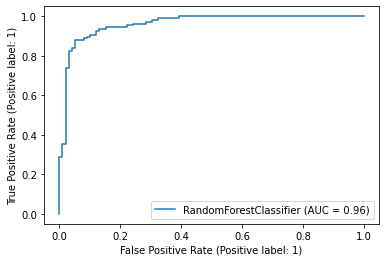

In [237]:
plot_roc_curve(optimal_rfc_model,x_test,y_test)

<AxesSubplot:xlabel='Feature Name'>

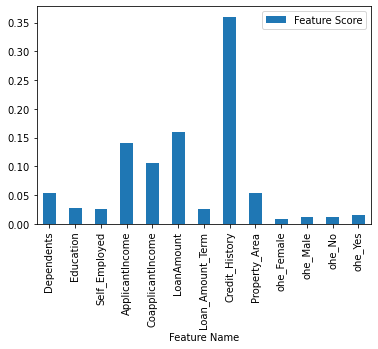

In [238]:
optimal_df_imp_features=pd.DataFrame({'Feature Name':x.columns,'Feature Score':optimal_rfc_model.feature_importances_})
optimal_df_imp_features.plot(0,kind='bar')            

## More the feature score , more important it is.

#### Storing all the important attributes in pickle file

In [200]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\rfc_model.pkl','wb') as file:
    pkl.dump(rfc_model,file)

In [201]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\optimal_rfc_model.pkl','wb') as file1:
    pkl.dump(optimal_rfc_model,file1)

In [202]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\ai_scaler.pkl','wb') as file2:
    pkl.dump(ai_scaler,file2)

In [203]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\cai_scaler.pkl','wb') as file3:
    pkl.dump(cai_scaler,file3)

In [204]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\la_scaler.pkl','wb') as file4:
    pkl.dump(la_scaler,file4)

In [205]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Loan Prediction\artifacts\xgb_model.pkl','wb') as file5:
    pkl.dump(xgb_model,file5)